In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
p_pheno = '/home/harveyaa/Documents/fMRI/data/ukbb_9cohorts/pheno_26-01-22.csv'
p_conn = '/home/harveyaa/Documents/fMRI/data/ukbb_9cohorts/connectomes_01-12-21.csv'

pheno = pd.read_csv(p_pheno,index_col=0)
conn = pd.read_csv(p_conn,index_col=0)

/home/harveyaa/miniconda3/envs/MTL/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (7,8,12,13,14,19,20,24,27,31,42,43,44,49,51,59,60,62,64,65,68,101,121,163) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cases = ['SZ',
        'ASD',
        'BIP',
        'DEL22q11_2',
        'DUP22q11_2',
        'DEL16p11_2',
        'DUP16p11_2',
        'DEL1q21_1',
        'DUP1q21_1']

conf = ['AGE',
        'SEX',
        'SITE',
        'mean_conn',
        'FD_scrubbed']

In [14]:
p_ids = '/home/harveyaa/Documents/masters/neuropsych_mtl/datasets/cv_folds/hybrid'

clfs = {'SVC_1':SVC(C=1,class_weight='balanced'),
        'SVC_10':SVC(C=10,class_weight='balanced'),
        'SVC_100':SVC(C=100,class_weight='balanced'),
        'LR':LogisticRegression(class_weight='balanced'),
        'kNN_5':KNeighborsClassifier()}

mean_acc_conf = {}
mean_acc_conn = {}
for clf in clfs:
        mean_acc_conf[clf] = []
        mean_acc_conn[clf] = []

all_fold_acc_lr_conn = {}
all_fold_acc_knn_conn = {}
all_fold_acc_svc1_conn = {}
all_fold_acc_svc10_conn = {}
all_fold_acc_svc100_conn = {}

for case in cases:
    print(case)
    # Load ids
    dataset_ids = pd.read_csv(os.path.join(p_ids,f"{case}.csv"),index_col=0)

    # Confound matrix
    df = pheno[pheno.index.isin(dataset_ids.index)]
    X = pd.get_dummies(df[conf],columns=['SEX','SITE'],drop_first=True)

    # Connectomes
    X_conn = conn[conn.index.isin(dataset_ids.index)]

    # Labels
    y = dataset_ids[case]

    acc_conf = {}
    acc_conn = {}
    for clf in clfs:
        acc_conf[clf] = []
        acc_conn[clf] = []
        
    for i in range(5):
        for clf in clfs:
            if f'fold_{i}' in dataset_ids.columns:
                # Test set ids for fold
                test_mask = (dataset_ids[f'fold_{i}'] == 1).to_numpy()

                # Train/test split
                X_train, X_test = X[~test_mask], X[test_mask]
                X_conn_train, X_conn_test = X_conn[~test_mask], X_conn[test_mask]
                y_train, y_test = y[~test_mask], y[test_mask]

                # Pred from confounds
                clfs[clf].fit(X_train,y_train)
                pred = clfs[clf].predict(X_test)
                acc_conf[clf].append(accuracy_score(y_test,pred))

                # Pred from connectomes
                clfs[clf].fit(X_conn_train,y_train)
                pred_conn = clfs[clf].predict(X_conn_test)
                conn_accuracy = accuracy_score(y_test,pred_conn)
                acc_conn[clf].append(conn_accuracy)

    all_fold_acc_lr_conn[case] = acc_conn['LR']
    all_fold_acc_knn_conn[case] = acc_conn['kNN_5']
    all_fold_acc_svc1_conn[case] = acc_conn['SVC_1']
    all_fold_acc_svc10_conn[case] = acc_conn['SVC_10']
    all_fold_acc_svc100_conn[case] = acc_conn['SVC_100']
    
    for clf in clfs:
        mean_acc_conf[clf].append(np.mean(acc_conf[clf]))
        mean_acc_conn[clf].append(np.mean(acc_conn[clf]))

SZ


/home/harveyaa/miniconda3/envs/MTL/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/harveyaa/miniconda3/envs/MTL/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

ASD


/home/harveyaa/miniconda3/envs/MTL/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/harveyaa/miniconda3/envs/MTL/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

BIP


/home/harveyaa/miniconda3/envs/MTL/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/harveyaa/miniconda3/envs/MTL/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

DEL22q11_2
DUP22q11_2
DEL16p11_2
DUP16p11_2
DEL1q21_1
DUP1q21_1


In [6]:
results = {}
for clf in clfs:
    results[clf] = pd.DataFrame([mean_acc_conf[clf],mean_acc_conn[clf]],columns=cases,index=['conf','conn']).transpose()

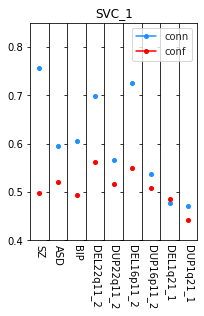

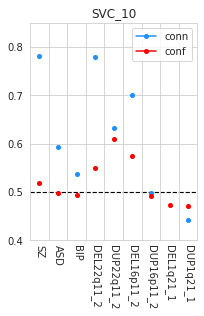

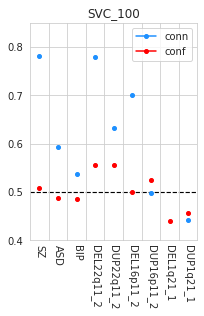

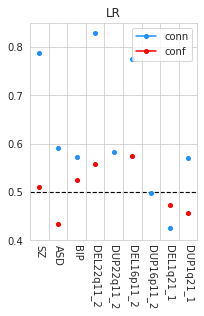

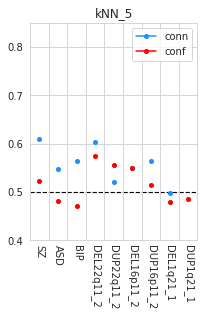

In [7]:
for clf in clfs:
    fig,ax = plt.subplots(1,len(cases),figsize=(3,4),sharey=True,sharex=True)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.ylim(0,1)
    sns.set_style('whitegrid')

    for j,case in enumerate(cases):
        conf_acc = results[clf].loc[case,'conf']
        conn_acc = results[clf].loc[case,'conn']

        ax[j].plot(0,conn_acc,marker='o',color='dodgerblue',ms=4,markerfacecolor='dodgerblue',label='conn')
        ax[j].plot(0,conf_acc,marker='o',color='red',ms=4,markerfacecolor='red',label='conf')

        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.1,0.1)
        ax[j].set_ylim(0.4,0.85)

        ax[j].set_xlabel(case,rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')
        fig.subplots_adjust(wspace=0)

    ax[4].set_title(clf)
    plt.legend()
#plt.tight_layout()
#plt.savefig('/home/harveyaa/Documents/masters/MTL/results/courtois_meeting/tasks_9/run1.png',dpi=300)

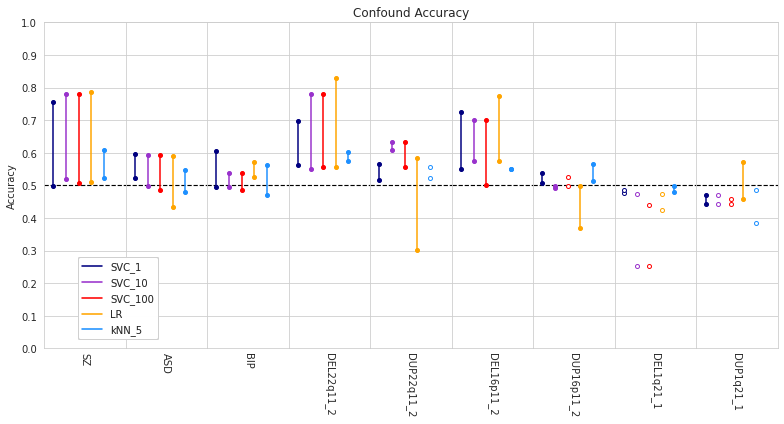

In [8]:
title = 'Confound Accuracy'
xlabels=None

fig,ax = plt.subplots(1,len(cases),figsize=(int(len(cases)/2)+7,6),sharey=True,sharex=True)

plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.ylim(0,1)
sns.set_style('whitegrid')
#colors = ['blue','red','green','orange','red','purple']
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']
for j,case in enumerate(cases):
    for i,clf in enumerate(clfs):
        conf_acc = results[clf].loc[case,'conf']
        conn_acc = results[clf].loc[case,'conn']

        if conf_acc > conn_acc:
            mfc = 'white'
            ls =''
        else:
            mfc = colors[i]
            ls = '-'
        ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)

        if not xlabels is None:
            #ax[j].set_xlabel(xlabels[j],rotation=270) 
            ax[j].set_xlabel(xlabels[j],rotation=90) 
        else:
            ax[j].set_xlabel(case,rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

    handles, _ = ax[0].get_legend_handles_labels()
    labels = clfs.keys()

    ax[0].set_ylabel('Accuracy')
    fig.legend(handles, labels, loc=(0.1,0.2))
    ax[int(len(cases)/2)].set_title(title)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0)
    #plt.savefig(os.path.join(p_ids,'both_acc.png'),dpi=300)

In [15]:
df_lr = pd.DataFrame(all_fold_acc_lr_conn)
df_knn = pd.DataFrame(all_fold_acc_knn_conn)
df_svc1 = pd.DataFrame(all_fold_acc_svc1_conn)
df_svc10 = pd.DataFrame(all_fold_acc_svc10_conn)
df_svc100 = pd.DataFrame(all_fold_acc_svc100_conn)

In [16]:
df_lr[df_lr.values < 0.55] = np.nan
df_lr

,SZ,ASD,BIP,DEL22q11_2,DUP22q11_2,DEL16p11_2,DUP16p11_2,DEL1q21_1,DUP1q21_1
0,0.793651,0.553191,NaN,0.866667,0.750000,0.625,0.600000,NaN,0.785714
1,0.793651,0.602151,NaN,0.800000,0.666667,0.875,NaN,NaN,NaN
2,0.809524,0.629032,NaN,0.821429,NaN,NaN,0.666667,NaN,NaN
3,0.793651,0.564516,0.678571,0.800000,0.666667,0.875,NaN,NaN,0.714286
4,0.746032,0.607527,0.653846,0.857143,NaN,1.000,NaN,NaN,NaN


In [17]:
df_knn[df_knn.values < 0.55] = np.nan
df_knn

,SZ,ASD,BIP,DEL22q11_2,DUP22q11_2,DEL16p11_2,DUP16p11_2,DEL1q21_1,DUP1q21_1
0,0.619048,NaN,0.566667,NaN,NaN,NaN,NaN,NaN,NaN
1,0.563492,0.575269,NaN,0.600000,0.666667,NaN,0.571429,NaN,NaN
2,0.642857,NaN,NaN,0.571429,NaN,0.625,0.583333,0.7,NaN
3,0.587302,NaN,0.714286,0.633333,NaN,0.625,0.750000,0.6,NaN
4,0.634921,NaN,0.653846,0.678571,0.666667,0.750,NaN,NaN,NaN


In [18]:
df_svc1[df_svc1.values < 0.55] = np.nan
df_svc1

,SZ,ASD,BIP,DEL22q11_2,DUP22q11_2,DEL16p11_2,DUP16p11_2,DEL1q21_1,DUP1q21_1
0,0.746032,NaN,0.633333,0.700000,NaN,0.625,0.600000,NaN,0.571429
1,0.738095,0.629032,0.576923,0.666667,0.666667,0.750,NaN,NaN,NaN
2,0.801587,0.629032,0.636364,0.678571,NaN,NaN,0.583333,NaN,NaN
3,0.753968,0.586022,0.571429,0.700000,0.833333,0.875,0.750000,0.6,0.571429
4,0.746032,0.586022,0.615385,0.750000,NaN,0.875,NaN,NaN,NaN


In [19]:
df_svc10[df_svc10.values < 0.55] = np.nan
df_svc10

,SZ,ASD,BIP,DEL22q11_2,DUP22q11_2,DEL16p11_2,DUP16p11_2,DEL1q21_1,DUP1q21_1
0,0.801587,0.553191,NaN,0.800000,NaN,NaN,NaN,NaN,NaN
1,0.738095,0.655914,0.576923,0.833333,0.666667,0.875,0.571429,NaN,NaN
2,0.825397,0.645161,NaN,0.714286,NaN,NaN,NaN,NaN,NaN
3,0.761905,0.553763,0.571429,0.733333,0.833333,0.875,0.750000,NaN,0.571429
4,0.777778,0.559140,0.576923,0.821429,0.666667,1.000,NaN,NaN,NaN


In [20]:
df_svc100[df_svc100.values < 0.55] = np.nan
df_svc100

,SZ,ASD,BIP,DEL22q11_2,DUP22q11_2,DEL16p11_2,DUP16p11_2,DEL1q21_1,DUP1q21_1
0,0.801587,0.553191,NaN,0.800000,NaN,NaN,NaN,NaN,NaN
1,0.738095,0.655914,0.576923,0.833333,0.666667,0.875,0.571429,NaN,NaN
2,0.825397,0.645161,NaN,0.714286,NaN,NaN,NaN,NaN,NaN
3,0.761905,0.553763,0.571429,0.733333,0.833333,0.875,0.750000,NaN,0.571429
4,0.777778,0.559140,0.576923,0.821429,0.666667,1.000,NaN,NaN,NaN
